# MTpy-v2: Create Transfer Function MTH5

In this example a MTH5 file for the Musgraves will be created that will contain transfer functions estimated from the time series (processed by Aurora?).  This is a shift in the older workflow of using MTpy.  In the older versions you would read in a list of EDI files for basically every thing you wanted to do with the data from plotting to making model files.  in MTpy-v2 operations are centralized from 2 main object `MTCollection` and `MTData`.  Here we will build an `MTCollection` which is a wrapper for an `MTH5` file.  With this creation all operations can be done from this object. Another benefit of creating a single file is that now you will have direct access to the data when you open the HDF5 file and you can share your data in a single self-describing file.

<div class="alert alert-block alert-info">
<b>Tip:</b> MTCollection is meant to be the storage object for transfer functions and MTData is meant to be the object for working with the data.  MTCollection is stored on the hard disk, where as MTData is read into RAM.
</div>


## Imports

In [6]:
from pathlib import Path
from mtpy import MTCollection

## Set Data Path

Hopefully you can access the `my80` dataset where the EDI files are stored.  Actually, I couldn't read those files in because they had some Null entries, I updated those and put them in scratch.  We might need to change this path during the course.

In [23]:
tf_path = Path(r"../../../scratch/nm05/jp0633/musgraves_edis")

Check to make sure the path exists

In [24]:
tf_path.exists()

True

Check that EDI files are present in the directory.

In [25]:
print(", ".join([fn.name for fn in tf_path.glob("*.edi")]))

SA320_2.edi, SA270.edi, SA301.edi, SA298.edi, SA299.edi, SA351.edi, SA227.edi, SA295.edi, SA272.edi, SA319.edi, SA247.edi, SA300.edi, SA293-2.edi, SA347.edi, SA325_2.edi, SA348.edi, SA326S.edi, SA322.edi, SA276.edi, SA225_2.edi, SA344.edi, SA297.edi, SA249.edi, SA321.edi, SA271.edi, SA273.edi, SA274_2.edi, SA323.edi, SA242.edi, SA246.edi, SA326N.edi, SA345.edi, SA250.edi, SA294.edi, SA324.edi, SA346.edi, SA277.edi, SA275.edi, SA243.edi, SA251.edi, SA350.edi, SA26W_2.edi, SA296.edi, SA248.edi


## Create MTCollection

Here we are going to create an MTH5 file and then close it upon writing.  The point of this is to demonstrate the safest way to make an MTH5 file by using the context manager `with`.  

<div class="alert alert-block alert-info">
<b>Tip:</b> When you open and MTH5 using `with` any errors are caught by the context manager and the MTH5 is then flushed and closed reducing the risk of corruption.  
</div>

In [28]:
with MTCollection() as mc:
    mc.open_collection(tf_path.joinpath("musgraves_tf.h5"))
    mc.add_tf(mc.make_file_list(tf_path))
    

23:11:03T06:32:29 | INFO | line:679 |mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file ../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5 in mode a
23:11:03T06:32:29 | WARNING | line:1057 |mth5.mth5 | get_survey | /Experiment/Surveys/Musgraves_SA does not exist, check survey_list for existing names.
23:11:03T06:33:46 | INFO | line:760 |mth5.mth5 | close_mth5 | Flushing and closing ../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5


## Interogate MTH5

Now that we have an MTH5 file we can interogate it.  

In [31]:
mc.open_collection(mc.mth5_collection.filename)

23:11:03T06:47:37 | WARNING | line:328 |mth5.mth5 | filename | MTH5 file is not open or has not been created yet. Returning default name


### Print Contents
The `__repr__` and `__str__` methods print out some important information about the file.

In [32]:
mc

Working Directory: ../../../scratch/nm05/jp0633/musgraves_edis
MTH5 file:         ../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5
	Number of Transfer Functions: 44

If you want to look at the full contents of the MTH5

In [33]:
mc.mth5_collection

/:
    |- Group: Experiment
    --------------------
        |- Group: Reports
        -----------------
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Surveys
        -----------------
            |- Group: Musgraves_SA
            ----------------------
                |- Group: Filters
                -----------------
                    |- Group: coefficient
                    ---------------------
                    |- Group: fap
                    -------------
                    |- Group: fir
                    -------------
                    |- Group: time_delay
                    --------------------
                    |- Group: zpk
                    -------------
                |- Group: Reports
                -----------------
                |- Group: Standards
                -------------------
                    --> Dataset: summary
                    ..........

### TF Summary

There is a convenience attribute for listing all transfer functions in the file `master_dataframe` which is a `pandas.DataFrame` object that provides a tabular form of the transfer functions within the file.

In [35]:
mc.master_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,SA225_2,Musgraves_SA,-28.50111,134.47621,219.0,SA225_2,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
1,SA26W2,Musgraves_SA,-28.49435,129.33328,335.0,SA26W2,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
2,SA274_2,Musgraves_SA,-27.55531,130.55070,504.0,SA274_2,none,True,True,False,8.0,8192.020972,<HDF5 object reference>,<HDF5 object reference>
3,SA295,Musgraves_SA,-26.99104,132.50675,564.0,SA295,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
4,SA326N,Musgraves_SA,-26.21286,129.46975,646.0,SA326N,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
5,SA326S,Musgraves_SA,-26.65605,129.37950,544.0,SA326S,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
6,SAA227,Musgraves_SA,-28.49864,133.49527,211.0,SAA227,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
7,SAA242,Musgraves_SA,-28.00196,134.05853,290.0,SAA242,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
8,SAA243,Musgraves_SA,-28.07727,133.49181,256.0,SAA243,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
9,SAA246,Musgraves_SA,-27.99918,132.00528,407.0,SAA246,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>


## Simple Plotting

`MTCollection` has plotting methods.  For all methods except for `plot_stations` a `MTData` object is created and therefore can be slow.  Its suggested to create an `MTData` object from the subset of data you want to use and work with that.\

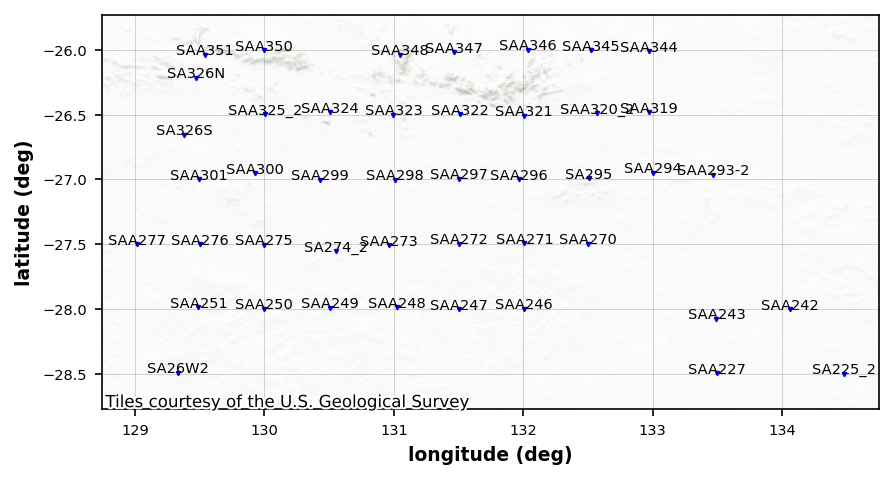

In [41]:
plot_stations = mc.plot_stations()

### Working DataFrame vs Master DataFrame

There are two dataframes that you can use to control which data you are looking at.  The `master_dataframe` will always produce all transfer functions in the MTH5 file, but if you want to look at a subset of data then you can set the `working_dataframe`.  For example if you wanted to look at a particular geographical region, a smaller subset of the data, or a specific survey.  

### Apply Bounding Box

You can apply a bounding box to the subset of data you want to look at.

In [42]:
#mc.apply_bbox(lon_min, lon_max, lat_min, lat_max)
mc.apply_bbox(129, 130, -27, -26)

Now the `working_dataframe` is set to only include those stations within the bounding box.

In [39]:
mc.working_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
4,SA326N,Musgraves_SA,-26.21286,129.46975,646.0,SA326N,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
5,SA326S,Musgraves_SA,-26.65605,129.37950,544.0,SA326S,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
28,SAA300,Musgraves_SA,-26.95145,129.92561,563.0,SAA300,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
29,SAA301,Musgraves_SA,-26.99755,129.49553,517.0,SAA301,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
42,SAA350,Musgraves_SA,-26.00200,129.99927,798.0,SAA350,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>
43,SAA351,Musgraves_SA,-26.03703,129.53928,702.0,SAA351,none,True,True,False,8.0,16384.041943,<HDF5 object reference>,<HDF5 object reference>


23:11:03T07:02:39 | WARNING | line:163 |mtpy.imaging.plot_stations | plot | Could not add base map because Tile URL resulted in a 404 error. Double-check your tile url:
https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/10/588/879


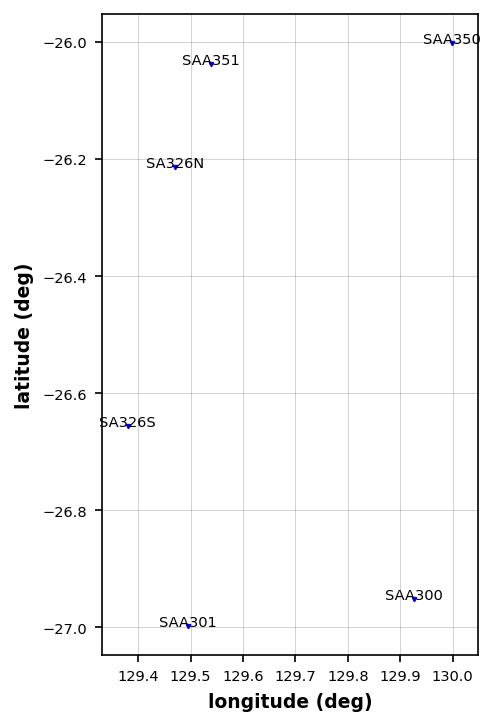

In [43]:
plot_stations = mc.plot_stations()

## Close MTH5

Its important to close the MTH5 before moving on to another task.  If the file remains open it can get corrupt or not used by other programs.  Also, if any changes were made to the file closing the file will make sure changes are flushed.

<div class="alert alert-block alert-danger">
<b>IMPORTANT:</b> Be sure to close the MTH5 before moving on, otherwise bad things can happen.
</div>

In [44]:
mc.close_collection()

23:11:03T07:04:30 | INFO | line:760 |mth5.mth5 | close_mth5 | Flushing and closing ../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5
